<a href="https://colab.research.google.com/github/EkansTCG/AI-hw-to-predict-house-prices/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
from google.colab import drive;
import pandas as pd;
import numpy as np;

# Download latest version
path = kagglehub.dataset_download("vedavyasv/usa-housing")

print("Path to dataset files:", path)
df = pd.read_csv(path + "/USA_Housing.csv")
df.head()


100%|██████████| 363k/363k [00:00<00:00, 50.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vedavyasv/usa-housing/versions/1


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [2]:
correlation_matrix = df.corr(numeric_only=True)
price_correlation = correlation_matrix['Price'].sort_values(ascending=False)
print(price_correlation)

Price                           1.000000
Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64


--- Scikit-learn Linear Regression Model Statistics ---
Starting state: Model initialized (no training yet).
---------------------------------------------
Final value of the cost (Mean Squared Error) on the test set: 47682698443.631424
Value of the parameters at convergence - Intercept: -1188139.237099149
Value of the parameters at convergence - Coefficients: [2.12591207e+01 1.60651746e+05]
---------------------------------------------


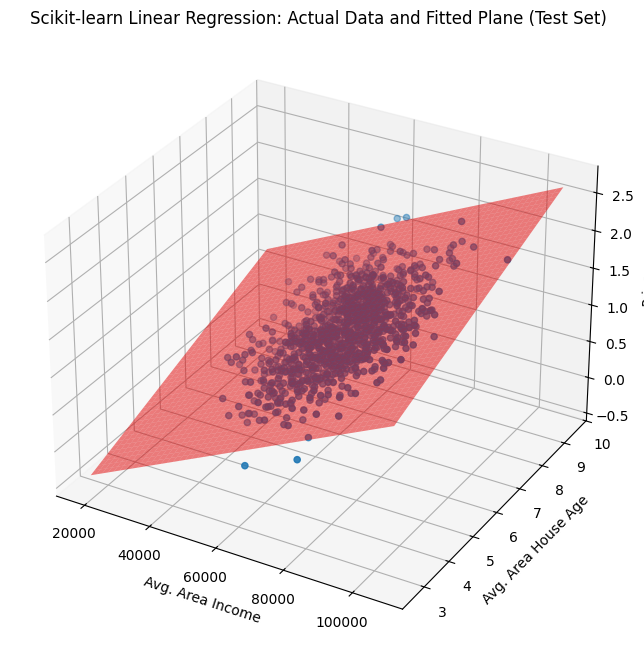

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Import for 3D plotting

# Select features (X) and target (y) from the DataFrame
# Using 'Avg. Area Income' and 'Avg. Area House Age' as features based on correlation analysis
X = df[['Avg. Area Income', 'Avg. Area House Age']].values
y = df['Price'].values

# --- Added code to handle missing values (same as in the gradient descent cell) ---
# Check for NaNs in X and y
nan_mask = np.isnan(X).any(axis=1) | np.isnan(y)

# Remove rows with NaNs from X and y
X = X[~nan_mask]
y = y[~nan_mask]

if np.sum(nan_mask) > 0:
    print(f"Removed {np.sum(nan_mask)} rows containing NaN values before scikit-learn Linear Regression.")
# --- End of added code ---


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Added print statements for scikit-learn model ---
print("--- Scikit-learn Linear Regression Model Statistics ---")
# Scikit-learn does not have 'starting parameters' or 'hyperparameters' in the same sense as GD.
# Training happens when .fit() is called.
print("Starting state: Model initialized (no training yet).")
print("-" * 45)
# --- End of added print statements ---


# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
# --- Modified print statement for final cost ---
print(f"Final value of the cost (Mean Squared Error) on the test set: {mse}")
# --- End of modified print statement ---

# Display the model's coefficients and intercept
# --- Modified print statements for final parameters ---
print(f"Value of the parameters at convergence - Intercept: {model.intercept_}")
print(f"Value of the parameters at convergence - Coefficients: {model.coef_}")
print("-" * 45)
# --- End of modified print statements ---


# --- 3D Plotting ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points from the test set
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, label='Actual Data (Test Set)')

# Create a meshgrid for the fitted plane using the original feature ranges
x1_surf, x2_surf = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 50),
                               np.linspace(X[:, 1].min(), X[:, 1].max(), 50))

# Calculate the predicted price for the meshgrid points using the trained scikit-learn model
# We need to reshape the meshgrid for prediction
x_surf_pred_input = np.vstack([x1_surf.ravel(), x2_surf.ravel()]).T
y_surf_pred = model.predict(x_surf_pred_input)

# Reshape the predicted prices to match the meshgrid shape
y_surf_pred = y_surf_pred.reshape(x1_surf.shape)


# Plot the fitted plane
ax.plot_surface(x1_surf, x2_surf, y_surf_pred, color='red', alpha=0.5, label='Fitted Plane')

ax.set_xlabel('Avg. Area Income')
ax.set_ylabel('Avg. Area House Age')
ax.set_zlabel('Price')
ax.set_title('Scikit-learn Linear Regression: Actual Data and Fitted Plane (Test Set)')
# Adding a legend for surfaces in 3D plots is a bit tricky, sometimes best to annotate or explain in text.
# ax.legend() # This might not work as expected for surfaces
plt.show()
# --- End of 3D Plotting ---

--- Gradient Descent Model Statistics ---
Starting parameters (theta): [0. 0. 0.]
Starting hyperparameters - Learning Rate: 0.01, Iterations: 1000
Starting value of the cost (MSE): 1636904225313.5107
-----------------------------------
Gradient Descent complete.
Value of the parameters at convergence (theta) for scaled features: [1229523.91018754  227524.65507619  159585.2840604 ]
Final value of the cost (Mean Squared Error) on the test set: 47683768392.83086
-----------------------------------


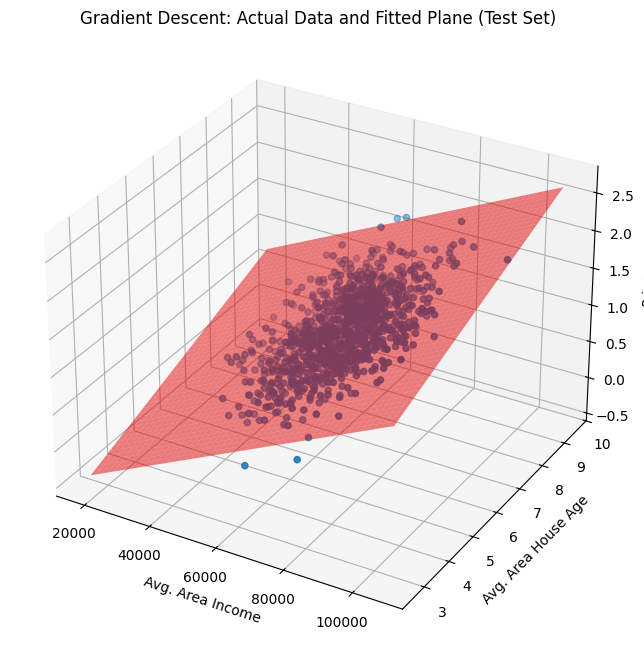

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Import for 3D plotting


# Select features (X) and target (y) from the DataFrame
# Using 'Avg. Area Income' and 'Avg. Area House Age' as features based on correlation analysis
X1 = df['Avg. Area Income'].values
X2 = df['Avg. Area House Age'].values
y = df['Price'].values

# Combine features into a single array
X = np.vstack((X1, X2)).T



# Check for NaNs in X and y
nan_mask = np.isnan(X).any(axis=1) | np.isnan(y)

# Remove rows with NaNs from X and y
X = X[~nan_mask]
y = y[~nan_mask]

if np.sum(nan_mask) > 0:
    print(f"Removed {np.sum(nan_mask)} rows containing NaN values.")
# --- End of added code ---

# Split the data into training and testing sets BEFORE scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = np.insert(X_train_scaled, 0, 1, axis=1)
X_test_scaled = np.insert(X_test_scaled, 0, 1, axis=1)



# Initialize parameters (theta0, theta1, theta2)
theta = np.zeros(X_train_scaled.shape[1])

# Set hyperparameters
learning_rate = 0.01
n_iterations = 1000

print("--- Gradient Descent Model Statistics ---")
print(f"Starting parameters (theta): {theta}")
print(f"Starting hyperparameters - Learning Rate: {learning_rate}, Iterations: {n_iterations}")

# Calculate and print starting cost (Mean Squared Error)
starting_y_hat = X_train_scaled @ theta
starting_errors = starting_y_hat - y_train
starting_cost = (1/len(y_train)) * np.sum(starting_errors**2)
print(f"Starting value of the cost (MSE): {starting_cost}")
print("-" * 35)



# Implement Gradient Descent on the training data
m = len(y_train) # Number of training examples

for i in range(n_iterations):
    # Calculate predictions
    y_hat = X_train_scaled @ theta

    # Calculate errors
    errors = y_hat - y_train

    # Calculate gradients
    gradients = (1/m) * X_train_scaled.T @ errors

    # Update parameters
    theta = theta - learning_rate * gradients


    if i % 100 == 0:
        cost = (1/m) * np.sum(errors**2)
        print(f"Iteration {i}, Cost: {cost}")


print("Gradient Descent complete.")

print(f"Value of the parameters at convergence (theta) for scaled features: {theta}")


# Make predictions on the test set
y_pred = X_test_scaled @ theta

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"Final value of the cost (Mean Squared Error) on the test set: {mse}")
print("-" * 35)



fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the actual data points from the test set
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, label='Actual Data (Test Set)')

# Create a meshgrid for the fitted plane using the original feature ranges
x1_surface, x2_surface = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 50),
                               np.linspace(X[:, 1].min(), X[:, 1].max(), 50))

# Scale the meshgrid points using the fitted scaler
x_surface_scaled = scaler.transform(np.vstack([x1_surface.ravel(), x2_surface.ravel()]).T)
x_surface_scaled = np.insert(x_surface_scaled, 0, 1, axis=1) # Add intercept to scaled data

# Calculate the predicted price for the scaled meshgrid points using the trained theta
y_surface_pred = x_surf_scaled @ theta

# Reshape the predicted prices to match the meshgrid shape
y_surface_pred = y_surface_pred.reshape(x1_surface.shape)


# Plot the fitted plane
ax.plot_surface(x1_surf, x2_surf, y_surf_pred, color='red', alpha=0.5, label='Fitted Plane')


ax.set_xlabel('Avg. Area Income')
ax.set_ylabel('Avg. Area House Age')
ax.set_zlabel('Price')
ax.set_title('Gradient Descent: Actual Data and Fitted Plane (Test Set)')

plt.show()
